In [ ]:
from typing import Tuple, List, Set
from analysis.task5 import get_identities_with_lowest_and_highest_ap_k
from analysis.task1 import add_identities

import os
os.chdir('./..')

identified_embeddings = add_identities()

In [3]:
from analysis.task1 import get_identities_from, PROBE_DIR
import requests


def query_probe(image_path: str, k: int = 5) -> Tuple[List[str], List[float]]:
    r = requests.post("http://localhost:3000/identify",
                      files={"image": open(image_path, 'rb')},
                      data={"k": str(k)})
    return r.json()["ranked identities"], r.json()["distances"]


def query_probes_with_identity(k: int = 1) -> List[Tuple[str, List[bool], List[float]]]:
    res = []

    for identity in get_identities_from(PROBE_DIR):
        identity_path = os.path.join(PROBE_DIR, identity)
        for file in os.listdir(identity_path):
            image_path = os.path.join(identity_path, file)
            q_res = query_probe(image_path, k=k)
            res.append((identity, [identity == file_name[:-5] for file_name in q_res[0]], q_res[1]))

    return res

In [4]:
samples = query_probes_with_identity()

worst_performing_identities, best_performing_identities, lowest_map, highest_map = get_identities_with_lowest_and_highest_ap_k([(x,y) for x,y,_ in samples])
print(f"Worst Performing Identities (map = {lowest_map}):", worst_performing_identities)
print(f"Best Performing Identities (map = {highest_map}):", best_performing_identities)

worst_performing_identities: Set[str] = set(worst_performing_identities)
best_performing_identities: Set[str] = set(best_performing_identities)

distances: List[Tuple[str, List[float]]] = [(x, z) for x,_,z in samples]

Worst Performing Identities (map = 0): ['Inam-ul-Haq', 'Mark_Cuban', 'Carl_Reiner', 'Demetrius_Ferraciu', 'Max_Mayfield', 'Charles_Schumer', 'David_Wolf', 'Johnny_Depp', 'Jada_Pinkett_Smith', 'Jorge_Batlle', 'Mariah_Carey', 'John_Walsh', 'Claire_Danes', 'Edward_Lu', 'Emile_Lahoud', 'Ernie_Fletcher', 'Mario_Dumont', 'Charlie_Zaa', 'Peter_Arnett', 'Steve_Waugh', 'Warren_Buffett', 'Marcus_Gronholm', 'Thabo_Mbeki', 'Robby_Ginepri', 'Hootie_Johnson', 'Joseph_Ralston', 'Susan_Collins', 'Jon_Gruden', 'Gabriel_Valdes', 'Sean_Astin', 'Jim_Edmonds', 'Lindsey_Graham', 'Butch_Davis', 'Steve_Spurrier', 'Paul_Patton', 'George_Ryan', 'Katie_Harman', 'Daryl_Hannah', 'Felix_Mantilla', 'Kathryn_Bigelow', 'Kosuke_Kitajima', 'Phil_Vassar', 'Maria_Luisa_Mendonca', 'Priscilla_Owen', 'Guillaume_Soro', 'Franz_Beckenbauer', 'James_Franco', 'Beth_Jones', 'John_McEnroe', 'Drew_Barrymore', 'Kirk_Ferentz', 'Laila_Ali', 'Larry_Lindsey', 'Kristanna_Loken', 'Rob_Schneider', 'George_Voinovich', 'Nasser_al-Kidwa', 'Mar

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the data properly
data: List[Tuple[float, str]] = []
for x, _, z in samples:
    if isinstance(z, list):
        for d in z:
            if x in best_performing_identities:
                group = "Best Performing"
            elif x in worst_performing_identities:
                group = "Worst Performing"
            else:
                continue
            data.append((d[0], group))
    else:
        # In case z is already a float
        if x in best_performing_identities:
            group = "Best Performing"
        elif x in worst_performing_identities:
            group = "Worst Performing"
        else:
            continue
        data.append((z, group))


<Figure size 600x500 with 0 Axes>

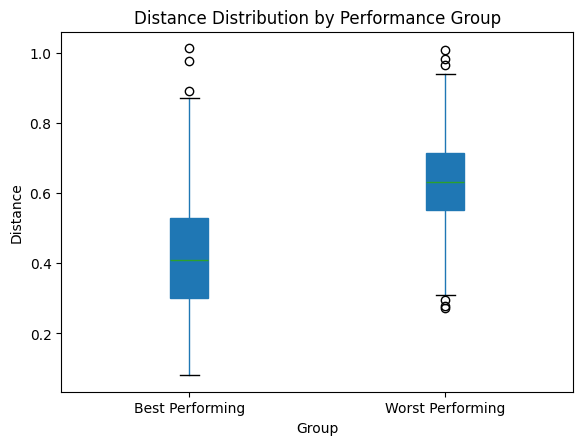

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Distance", "Group"])

# Create boxplot
plt.figure(figsize=(6, 5))
df.boxplot(column="Distance", by="Group", grid=False, patch_artist=True)

plt.title("Distance Distribution by Performance Group")
plt.suptitle("")  # remove automatic Pandas title
plt.xlabel("Group")
plt.ylabel("Distance")
plt.show()